In [1]:
import numpy
print(numpy.__version__)

1.24.4


In [2]:
import pandas as pd
import numpy as np
np.bool = bool  # temporary compatibility shim
from pathlib import Path
import os
import matplotlib.pyplot as plt
import seaborn as sns


Bad key text.latex.preview in file c:\Users\34663\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 123 ('text.latex.preview : False')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.7.5/lib/matplotlib/mpl-data/matplotlibrc
or from the matplotlib source distribution

Bad key mathtext.fallback_to_cm in file c:\Users\34663\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 155 ('mathtext.fallback_to_cm : True  # When True, use symbols from the Computer Modern')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.7.5/lib/matplotlib/mpl-data/matplotlibrc
or from the matplotlib source distribution

Bad key savefig.jpeg_quality in file c:\Users\34663\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 418 ('savefig.jpeg_quality: 95       # when a jpeg is saved, the default 

In [3]:
# Load train.csv
data_dir = Path("../data_processed")
train_df = pd.read_csv(data_dir / "all_features.csv", index_col=0, parse_dates=True)

print(f"TData shape: {train_df.shape}")
print(f"Date range: {train_df.index.min()} to {train_df.index.max()}")
print(f"\nColumns: {list(train_df.columns)}")
print(f"\nFirst few rows:")
train_df.head()


TData shape: (6285, 22)
Date range: 2000-12-05 00:00:00 to 2025-10-24 00:00:00

Columns: ['LOPBDY LME Comdty', 'returns', 'MA7', 'MA30', 'rolling_volatility', 'EMA5', 'EMA15', 'EMA30', 'MACD5', 'MACD15', 'MACD30', 'RSI', 'BB_upper', 'BB_middle', 'BB_lower', 'return_7d', 'target', 'future_return', 'future_MA7', 'future_MA30', 'future_rolling_volatility', 'future_return_7d']

First few rows:


,LOPBDY LME Comdty,returns,MA7,MA30,rolling_volatility,EMA5,EMA15,EMA30,MACD5,MACD15,...,BB_upper,BB_middle,BB_lower,return_7d,target,future_return,future_MA7,future_MA30,future_rolling_volatility,future_return_7d
Security,,,,,,,,,,,,,,,,,,,,,
2025-10-24,1979.0,-0.004026,1989.000000,1993.266667,0.007584,1986.095324,1996.292291,1993.244578,-8.558650,1.638318,...,2064.601068,2011.175,1957.748932,-0.005528,0,-0.003952,2022.785714,2021.133333,0.006395,-0.003459
2025-10-23,1973.0,-0.003032,1985.857143,1993.633333,0.007477,1981.730216,1993.380755,1991.938477,-11.319760,0.330779,...,2065.739353,2010.175,1954.610647,-0.011028,0,-0.002975,2020.428571,2021.016667,0.006308,-0.008140
2025-10-22,1953.0,-0.010137,1979.142857,1993.366667,0.007712,1972.153477,1988.333160,1989.426317,-17.929833,-1.750150,...,2068.975875,2008.125,1947.274125,-0.023500,0,-0.009948,2016.642857,2020.733333,0.006425,-0.013138
2025-10-21,1949.0,-0.002048,1973.857143,1992.833333,0.007709,1964.435652,1983.416515,1986.818167,-22.604451,-3.623587,...,2071.261043,2004.975,1938.688957,-0.018630,0,-0.002763,2011.357143,2020.400000,0.006434,-0.018299
2025-10-20,1938.0,-0.005644,1965.142857,1992.566667,0.007573,1955.623768,1977.739451,1983.668608,-27.783735,-5.668051,...,2072.675932,2000.675,1928.674068,-0.030515,0,0.001763,2005.928571,2019.950000,0.006408,-0.018752


In [ ]:
# Extract features (X) - exclude target variables
irr_cols = ['LOPBDY LME Comdty', 'return_7d', 'target', 'Security']
X = train_df.drop(columns=irr_cols, errors='ignore')

print(f"Feature matrix X shape: {X.shape}")
print(f"Number of features: {X.shape[1]}")
print(f"\nFeature columns:")
print(list(X.columns))
print(f"\nFirst few rows of X:")
X.head()

Feature matrix X shape: (6285, 19)
Number of features: 19

Feature columns:
['returns', 'MA7', 'MA30', 'rolling_volatility', 'EMA5', 'EMA15', 'EMA30', 'MACD5', 'MACD15', 'MACD30', 'RSI', 'BB_upper', 'BB_middle', 'BB_lower', 'future_return', 'future_MA7', 'future_MA30', 'future_rolling_volatility', 'future_return_7d']

First few rows of X:


,returns,MA7,MA30,rolling_volatility,EMA5,EMA15,EMA30,MACD5,MACD15,MACD30,RSI,BB_upper,BB_middle,BB_lower,future_return,future_MA7,future_MA30,future_rolling_volatility,future_return_7d
Security,,,,,,,,,,,,,,,,,,,
2025-10-24,-0.004026,1989.000000,1993.266667,0.007584,1986.095324,1996.292291,1993.244578,-8.558650,1.638318,-1.409395,26.126126,2064.601068,2011.175,1957.748932,-0.003952,2022.785714,2021.133333,0.006395,-0.003459
2025-10-23,-0.003032,1985.857143,1993.633333,0.007477,1981.730216,1993.380755,1991.938477,-11.319760,0.330779,-1.111499,27.531646,2065.739353,2010.175,1954.610647,-0.002975,2020.428571,2021.016667,0.006308,-0.008140
2025-10-22,-0.010137,1979.142857,1993.366667,0.007712,1972.153477,1988.333160,1989.426317,-17.929833,-1.750150,-0.656994,25.438596,2068.975875,2008.125,1947.274125,-0.009948,2016.642857,2020.733333,0.006425,-0.013138
2025-10-21,-0.002048,1973.857143,1992.833333,0.007709,1964.435652,1983.416515,1986.818167,-22.604451,-3.623587,-0.221935,21.958457,2071.261043,2004.975,1938.688957,-0.002763,2011.357143,2020.400000,0.006434,-0.018299
2025-10-20,-0.005644,1965.142857,1992.566667,0.007573,1955.623768,1977.739451,1983.668608,-27.783735,-5.668051,0.261106,19.943820,2072.675932,2000.675,1928.674068,0.001763,2005.928571,2019.950000,0.006408,-0.018752


Explained Variance Ratio for first 10 components:
PC1: 0.5285 (52.85%)
PC2: 0.1941 (19.41%)
PC3: 0.0999 (9.99%)
PC4: 0.0865 (8.65%)
PC5: 0.0409 (4.09%)
PC6: 0.0246 (2.46%)
PC7: 0.0164 (1.64%)
PC8: 0.0045 (0.45%)
PC9: 0.0036 (0.36%)
PC10: 0.0006 (0.06%)

Cumulative variance for first 10 components: 0.9995 (99.95%)

Top 10 Features based on PCA:
                  Feature  Importance
                      RSI    2.398816
         future_return_7d    2.367383
                   MACD30    2.239141
                  returns    2.142631
            future_return    2.101570
future_rolling_volatility    1.899949
       rolling_volatility    1.846470
                    MACD5    1.690649
                   MACD15    1.397443
                 BB_lower    1.260165


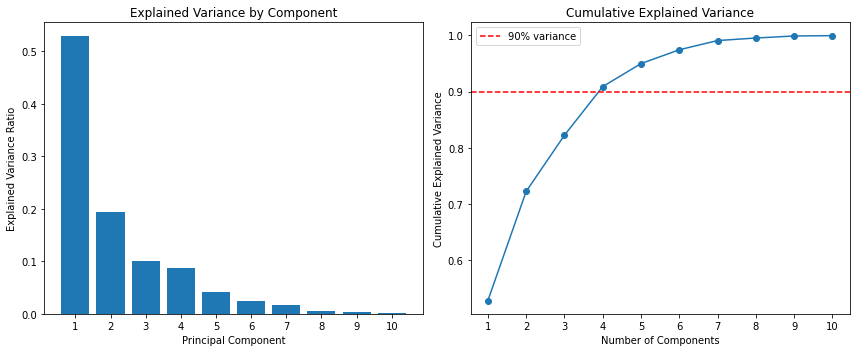

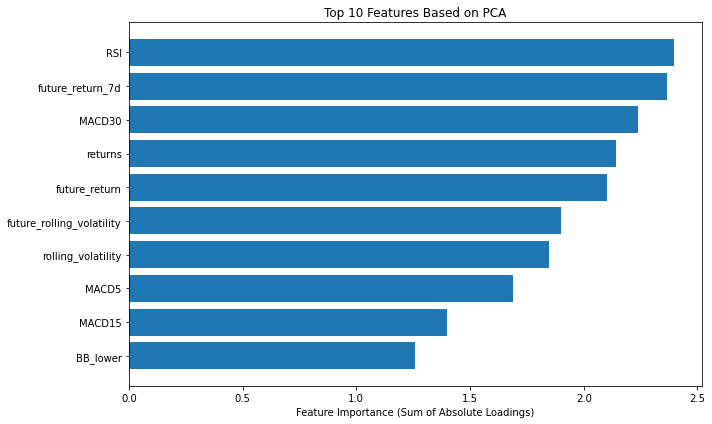


Top 10 Feature Names:
['RSI', 'future_return_7d', 'MACD30', 'returns', 'future_return', 'future_rolling_volatility', 'rolling_volatility', 'MACD5', 'MACD15', 'BB_lower']


In [5]:
# PCA Analysis to determine top 10 features
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Standardize the features (important for PCA)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Get explained variance ratio
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

# Print explained variance for first 10 components
print("Explained Variance Ratio for first 10 components:")
for i in range(min(10, len(explained_variance))):
    print(f"PC{i+1}: {explained_variance[i]:.4f} ({explained_variance[i]*100:.2f}%)")

print(f"\nCumulative variance for first 10 components: {cumulative_variance[9]:.4f} ({cumulative_variance[9]*100:.2f}%)")

# Get component loadings (correlations between features and principal components)
component_loadings = pca.components_.T  # Transpose to get features x components

# Calculate feature importance based on absolute loadings across top components
# We'll use the first 10 components to determine top features
n_components_to_use = min(10, len(pca.components_))
feature_importance = np.abs(component_loadings[:, :n_components_to_use]).sum(axis=1)

# Create DataFrame with feature importance
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importance
}).sort_values('Importance', ascending=False)

print(f"\nTop 10 Features based on PCA:")
print(feature_importance_df.head(10).to_string(index=False))

# Visualize explained variance
plt.figure(figsize=(12, 5))

# Plot 1: Explained variance per component
plt.subplot(1, 2, 1)
plt.bar(range(1, min(11, len(explained_variance)+1)), explained_variance[:10])
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance by Component')
plt.xticks(range(1, min(11, len(explained_variance)+1)))

# Plot 2: Cumulative explained variance
plt.subplot(1, 2, 2)
plt.plot(range(1, min(11, len(cumulative_variance)+1)), cumulative_variance[:10], marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance')
plt.axhline(y=0.90, color='r', linestyle='--', label='90% variance')
plt.legend()
plt.xticks(range(1, min(11, len(cumulative_variance)+1)))

plt.tight_layout()
plt.show()

# Visualize top 10 features
plt.figure(figsize=(10, 6))
top_10_features = feature_importance_df.head(10)
plt.barh(range(len(top_10_features)), top_10_features['Importance'].values)
plt.yticks(range(len(top_10_features)), top_10_features['Feature'].values)
plt.xlabel('Feature Importance (Sum of Absolute Loadings)')
plt.title('Top 10 Features Based on PCA')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# Store top 10 feature names
top_10_feature_names = top_10_features['Feature'].tolist()
print(f"\nTop 10 Feature Names:")
print(top_10_feature_names)


In [6]:
# Features data description
stat = X.describe(percentiles=[.01,.05,.5,.95,.99]).T
stat['missing'] = X.isna().sum()
stat['skew'] = X.skew(numeric_only=True)
stat['kurt'] = X.kurt(numeric_only=True)

# IQR outliers (outside [Q1-3*IQR, Q3+3*IQR])
q1, q3 = X.quantile(.25), X.quantile(.75)
iqr = q3 - q1
out_mask = (X.lt(q1 - 3*iqr)) | (X.gt(q3 + 3*iqr))
stat['outliers_iqr3'] = out_mask.sum()

# Robust MAD z-score (good for heavy tails)
med = X.median()
mad = (X - med).abs().median() * 1.4826
mad_z = (X - med).div(mad.replace(0, np.nan)).abs()
stat['outliers_mad5'] = (mad_z > 5).sum()

stat.sort_values('outliers_mad5', ascending=False)

,count,mean,std,min,1%,5%,50%,95%,99%,max,missing,skew,kurt,outliers_iqr3,outliers_mad5
MACD30,6285.0,0.479677,9.353675,-50.254320,-33.517783,-14.710471,0.733983,14.039990,22.429446,42.041809,0,-0.762030,5.442461,136,122
MACD5,6285.0,-2.556849,67.815623,-312.382724,-176.853375,-97.743782,-5.451072,103.647116,222.114960,424.828353,0,0.717748,5.314359,146,121
MACD15,6285.0,-1.331552,30.494062,-141.798195,-78.879217,-43.677009,-2.544895,47.042055,106.373278,188.129595,0,0.791215,5.629195,149,121
rolling_volatility,6285.0,0.017675,0.007877,0.004321,0.007536,0.009320,0.015101,0.033771,0.042625,0.058406,0,1.582955,2.899153,49,103
future_rolling_volatility,6285.0,0.016644,0.007760,0.005157,0.006445,0.008301,0.014443,0.032082,0.043830,0.057209,0,1.629010,3.443571,41,97
future_return_7d,6285.0,-0.000442,0.048655,-0.264856,-0.118748,-0.075163,-0.001923,0.080256,0.150313,0.274281,0,0.467046,3.139920,53,39
future_return,6285.0,-0.000063,0.018344,-0.119048,-0.048173,-0.027930,-0.000226,0.027614,0.054638,0.137116,0,0.364523,4.268061,43,31
returns,6285.0,-0.000047,0.019325,-0.165398,-0.049516,-0.030173,0.000000,0.030440,0.058325,0.124066,0,0.269965,3.736951,38,29
EMA30,6285.0,1775.496203,659.463092,416.824495,430.543054,465.758814,1989.379437,2572.427187,3185.064570,3638.574981,0,-0.665119,-0.143209,0,0
EMA15,6285.0,1773.684973,664.500820,411.527979,431.134251,465.103848,1985.084037,2578.880224,3192.708371,3782.515206,0,-0.625873,-0.123490,0,0


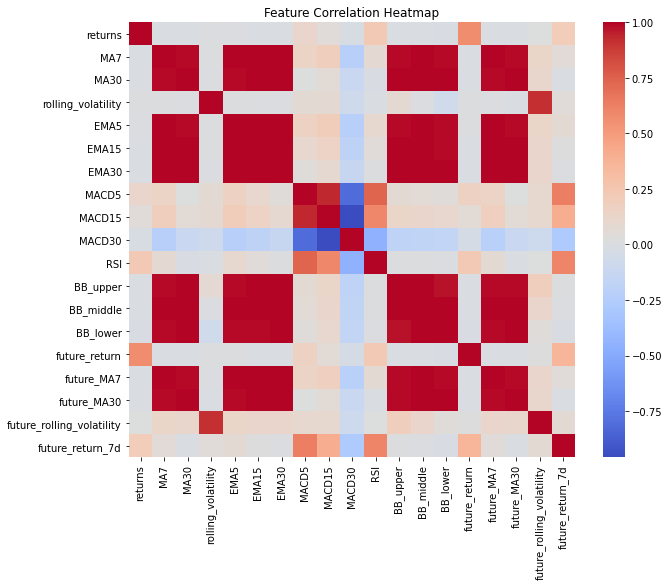

In [7]:
# Set path to store figures
figure_path = Path("../src/interpretation")

# plot the heatmap for feaature correlaation
corr = X.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=False, cmap="coolwarm")

plt.title("Feature Correlation Heatmap")

# save the figure
plt.savefig(os.path.join(figure_path, "feature_corr_heatmap.png"), dpi=300, bbox_inches="tight")

plt.show()

HIGH CORRELATION PAIRS IN TOP 10 PCA FEATURES

Found 3 high correlation pairs (|correlation| > 0.85):

                 Feature1           Feature2  Correlation
                   MACD15             MACD30    -0.957505
                   MACD15              MACD5     0.935051
future_rolling_volatility rolling_volatility     0.908826

Summary:
  Total high correlation pairs in top 10: 3
  Positive correlations: 2
  Negative correlations: 1
  Max correlation: 0.9575
  Min correlation: 0.9088


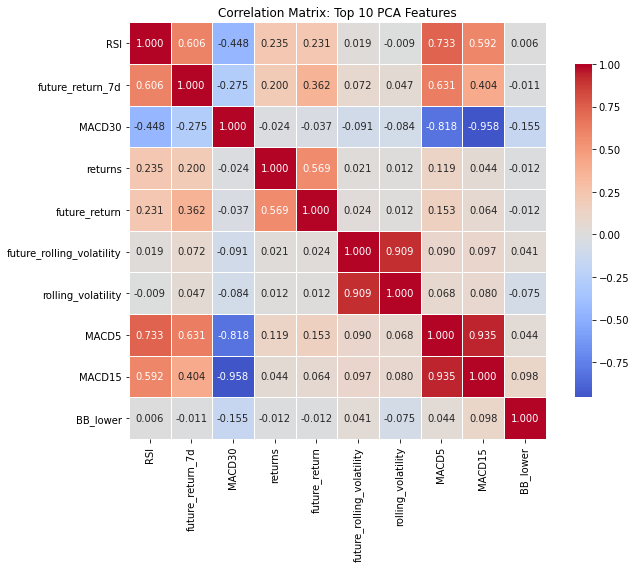


High correlation pairs saved to: ..\src\data\top10_pca_high_correlation_pairs.csv


In [10]:
# Check high correlation among top 10 features from first PCA (Cell 4)
# Filter high correlation pairs to only include pairs where both features are in top 10

# Top 10 features from first PCA (Cell 4)
top_10_pca_features = ['RSI', 'future_return_7d', 'MACD30', 'returns', 'future_return', 
                       'future_rolling_volatility', 'rolling_volatility', 'MACD5', 'MACD15', 'BB_lower']

# Get correlation matrix for all features
corr_matrix = X.corr()

# Find high correlation pairs among top 10 PCA features
top_10_high_corr_pairs = []
for i in top_10_pca_features:
    for j in top_10_pca_features:
        if i < j:  # Only check upper triangle to avoid duplicates
            if i in corr_matrix.columns and j in corr_matrix.columns:
                corr_val = corr_matrix.loc[i, j]
                if abs(corr_val) > 0.85:  # High correlation threshold
                    top_10_high_corr_pairs.append({
                        'Feature1': i,
                        'Feature2': j,
                        'Correlation': corr_val
                    })

# Convert to DataFrame for better display
if top_10_high_corr_pairs:
    top_10_high_corr_df = pd.DataFrame(top_10_high_corr_pairs)
    top_10_high_corr_df = top_10_high_corr_df.sort_values('Correlation', key=abs, ascending=False)
    
    print("="*60)
    print("HIGH CORRELATION PAIRS IN TOP 10 PCA FEATURES")
    print("="*60)
    print(f"\nFound {len(top_10_high_corr_pairs)} high correlation pairs (|correlation| > 0.85):\n")
    print(top_10_high_corr_df.to_string(index=False))
    
    print(f"\nSummary:")
    print(f"  Total high correlation pairs in top 10: {len(top_10_high_corr_pairs)}")
    print(f"  Positive correlations: {(top_10_high_corr_df['Correlation'] > 0).sum()}")
    print(f"  Negative correlations: {(top_10_high_corr_df['Correlation'] < 0).sum()}")
    if len(top_10_high_corr_df) > 0:
        print(f"  Max correlation: {top_10_high_corr_df['Correlation'].abs().max():.4f}")
        print(f"  Min correlation: {top_10_high_corr_df['Correlation'].abs().min():.4f}")
    
    # Visualize correlation matrix for top 10 features
    plt.figure(figsize=(10, 8))
    top_10_corr = corr_matrix.loc[top_10_pca_features, top_10_pca_features]
    sns.heatmap(top_10_corr, annot=True, fmt='.3f', cmap='coolwarm', center=0, 
                square=True, linewidths=1, cbar_kws={"shrink": 0.8})
    plt.title('Correlation Matrix: Top 10 PCA Features')
    plt.tight_layout()
    
    # Save the figure
    figure_path = Path("../src/interpretation")
    plt.savefig(os.path.join(figure_path, "top10_pca_features_correlation.png"), dpi=300, bbox_inches="tight")
    plt.show()
    
    # Save high correlation pairs to CSV
    output_path = Path("../src/data/top10_pca_high_correlation_pairs.csv")
    top_10_high_corr_df.to_csv(output_path, index=False)
    print(f"\nHigh correlation pairs saved to: {output_path}")
else:
    print("="*60)
    print("HIGH CORRELATION PAIRS IN TOP 10 PCA FEATURES")
    print("="*60)
    print("\nNo high correlation pairs found (|correlation| > 0.85) among top 10 PCA features.")
    
    # Still show correlation matrix for visualization
    plt.figure(figsize=(10, 8))
    top_10_corr = corr_matrix.loc[top_10_pca_features, top_10_pca_features]
    sns.heatmap(top_10_corr, annot=True, fmt='.3f', cmap='coolwarm', center=0, 
                square=True, linewidths=1, cbar_kws={"shrink": 0.8})
    plt.title('Correlation Matrix: Top 10 PCA Features')
    plt.tight_layout()
    plt.show()



In [8]:
# Find all high correlation pairs (|correlation| > 0.85)
high_corr_pairs = []
for i in corr.columns:
    for j in corr.columns:
        if i < j:  # Only check upper triangle to avoid duplicates
            corr_val = corr.loc[i, j]
            if abs(corr_val) > 0.85:
                high_corr_pairs.append({
                    'Feature1': i,
                    'Feature2': j,
                    'Correlation': corr_val
                })

# Convert to DataFrame for better display
if high_corr_pairs:
    high_corr_df = pd.DataFrame(high_corr_pairs)
    high_corr_df = high_corr_df.sort_values('Correlation', key=abs, ascending=False)
    
    print(f"Found {len(high_corr_pairs)} high correlation pairs (|correlation| > 0.85):\n")
    print(high_corr_df.to_string(index=False))
    
    # Also print summary statistics
    print(f"\nSummary:")
    print(f"  Total pairs: {len(high_corr_pairs)}")
    print(f"  Positive correlations: {(high_corr_df['Correlation'] > 0).sum()}")
    print(f"  Negative correlations: {(high_corr_df['Correlation'] < 0).sum()}")
    print(f"  Max correlation: {high_corr_df['Correlation'].abs().max():.4f}")
    print(f"  Min correlation: {high_corr_df['Correlation'].abs().min():.4f}")
else:
    print("No high correlation pairs found (|correlation| > 0.85)")

# Store the DataFrame for further use
high_corr_df

# Save to CSV file
output_path = Path("../src/data/high_correlation_pairs.csv")
high_corr_df.to_csv(output_path, index=False)
print(f"\nHigh correlation pairs saved to: {output_path}")

Found 48 high correlation pairs (|correlation| > 0.85):

                 Feature1           Feature2  Correlation
                     EMA5                MA7     0.999590
                     MA30        future_MA30     0.999406
                    EMA30               MA30     0.999260
                      MA7         future_MA7     0.999254
                BB_middle              EMA15     0.999000
                BB_middle              EMA30     0.998951
                    EMA15                MA7     0.998770
                    EMA30        future_MA30     0.998733
                     EMA5         future_MA7     0.998685
                BB_middle               MA30     0.998342
                    EMA15         future_MA7     0.998309
                    EMA15              EMA30     0.998245
                    EMA15               EMA5     0.998142
                BB_middle        future_MA30     0.997672
                    EMA15               MA30     0.996368
               

In [11]:
# Dropped features
X = X.drop(['MACD30', 'MACD5'], axis=1)

Explained Variance Ratio for first 10 components:
PC1: 0.5872 (58.72%)
PC2: 0.1408 (14.08%)
PC3: 0.1113 (11.13%)
PC4: 0.0788 (7.88%)
PC5: 0.0341 (3.41%)
PC6: 0.0245 (2.45%)
PC7: 0.0173 (1.73%)
PC8: 0.0050 (0.50%)
PC9: 0.0007 (0.07%)
PC10: 0.0002 (0.02%)

Cumulative variance for first 10 components: 0.9998 (99.98%)

Top 10 Features based on PCA:
                  Feature  Importance
                   MACD15    2.365512
                  returns    2.288741
            future_return    2.204890
                      RSI    2.192209
         future_return_7d    2.112292
future_rolling_volatility    1.773683
       rolling_volatility    1.739447
                 BB_lower    1.508184
                 BB_upper    1.486298
               future_MA7    1.010165


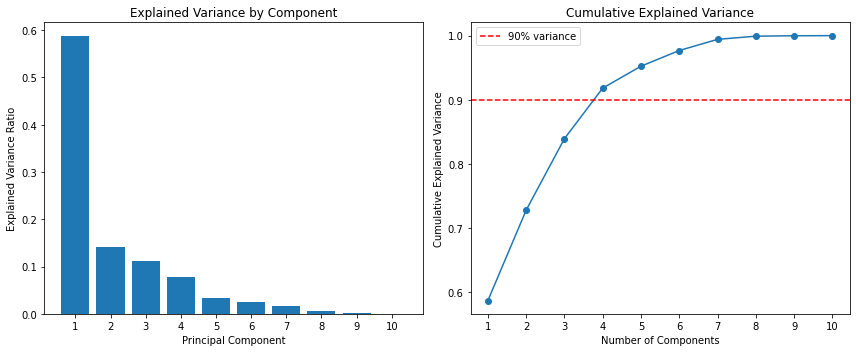

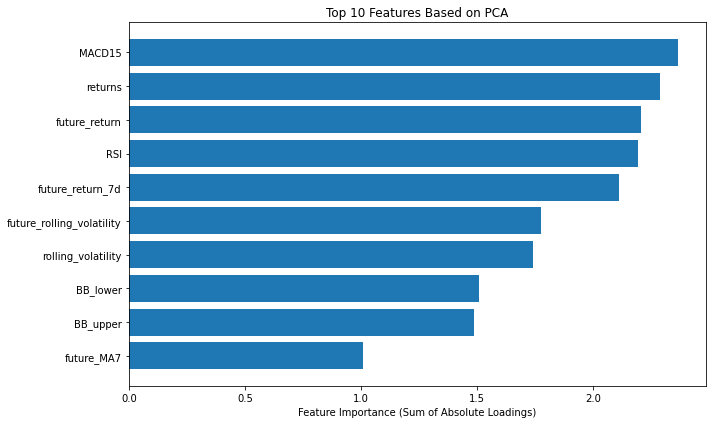


Top 10 Feature Names:
['MACD15', 'returns', 'future_return', 'RSI', 'future_return_7d', 'future_rolling_volatility', 'rolling_volatility', 'BB_lower', 'BB_upper', 'future_MA7']


In [12]:
# PCA Analysis to determine top 10 features
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Standardize the features (important for PCA)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Get explained variance ratio
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

# Print explained variance for first 10 components
print("Explained Variance Ratio for first 10 components:")
for i in range(min(10, len(explained_variance))):
    print(f"PC{i+1}: {explained_variance[i]:.4f} ({explained_variance[i]*100:.2f}%)")

print(f"\nCumulative variance for first 10 components: {cumulative_variance[9]:.4f} ({cumulative_variance[9]*100:.2f}%)")

# Get component loadings (correlations between features and principal components)
component_loadings = pca.components_.T  # Transpose to get features x components

# Calculate feature importance based on absolute loadings across top components
# We'll use the first 10 components to determine top features
n_components_to_use = min(10, len(pca.components_))
feature_importance = np.abs(component_loadings[:, :n_components_to_use]).sum(axis=1)

# Create DataFrame with feature importance
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importance
}).sort_values('Importance', ascending=False)

print(f"\nTop 10 Features based on PCA:")
print(feature_importance_df.head(10).to_string(index=False))

# Visualize explained variance
plt.figure(figsize=(12, 5))

# Plot 1: Explained variance per component
plt.subplot(1, 2, 1)
plt.bar(range(1, min(11, len(explained_variance)+1)), explained_variance[:10])
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance by Component')
plt.xticks(range(1, min(11, len(explained_variance)+1)))

# Plot 2: Cumulative explained variance
plt.subplot(1, 2, 2)
plt.plot(range(1, min(11, len(cumulative_variance)+1)), cumulative_variance[:10], marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance')
plt.axhline(y=0.90, color='r', linestyle='--', label='90% variance')
plt.legend()
plt.xticks(range(1, min(11, len(cumulative_variance)+1)))

plt.tight_layout()
plt.show()

# Visualize top 10 features
plt.figure(figsize=(10, 6))
top_10_features = feature_importance_df.head(10)
plt.barh(range(len(top_10_features)), top_10_features['Importance'].values)
plt.yticks(range(len(top_10_features)), top_10_features['Feature'].values)
plt.xlabel('Feature Importance (Sum of Absolute Loadings)')
plt.title('Top 10 Features Based on PCA')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# Store top 10 feature names
top_10_feature_names = top_10_features['Feature'].tolist()
print(f"\nTop 10 Feature Names:")
print(top_10_feature_names)